# LAB 2 : Multi Class Classification Using Perceptron 

Name : Hrishikesh Pable

Roll Number : 200010037



# **Problem 1** : Demonstrate the 2-input, 2-output neural network, to perform 4 class, classification task.

  1. Generate appropriate data synthetically (Ex: Multivariate Gaussian data with different mean vectors and Identity covariance matrix can be used )
  2. Have to convert the class labels (0, 1, 2, 3) to its corresponding binary value.
  3. Use appropriate activation function and learning rule .
  4. Draw the learned separating hyper planes in each iteration. (using the information
  from the learned weights).
  5. After the network is learned, a independent test set can be used to validate the performance. (Performance can be shown through accuracy/error percentage, justify
  the error by drawing the separating hyper-plane over the test set data (use different
  color code for different class label) )

## Write down the Objectives, Hypothesis and Experimental description for the above problem

### Objectives
The objective of this task is to classify data using 2-output perceptron.

The data is generated synthetically using multivariate gaussian distribution with different mean vectors and identity covariance matrix.

The equation of the lines are:

$$  a_1 + b_1x_1 + c_1x_2 = 0 $$

$$  a_2 + b_2x_1 + c_2x_2 = 0 $$

The weights are: w = $$ [[a_1, a_2], [b_1, b_2], [c_1, c_2]] $$

The weights are updated using the following rule:

$$ w = w + \alpha * (y - sgn(\hat y) ) * x $$

where:

$$ \hat y = w_{pred}^{T} x $$


## Programming : 
  Please write a program to demonstrate the same

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def GenerateData(class_size,mean,cov):
    
    data = []
    
    for mean_vec in mean:
        data.append(np.random.multivariate_normal(mean_vec, cov, size=class_size))
        
    return data

Text(0, 0.5, 'x2')

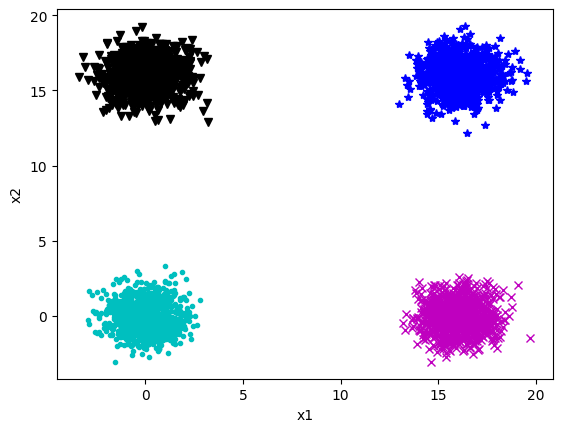

In [3]:
## Define Mean and Variance for all the data points

Mean = [(0,0), (16,0), (0,16), (16,16)]
Cov = [[1,0], [0,1]]

data = GenerateData(1000, Mean, Cov)

plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='c')
plt.plot(data[1][:,0],data[1][:,1],'x',color='m')
plt.plot(data[2][:,0],data[2][:,1],'v',color='k')
plt.plot(data[3][:,0],data[3][:,1],'*',color='b')
plt.xlabel('x1')
plt.ylabel('x2')



In [270]:
## Augment the Data 

data_total = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])
data_aug=np.concatenate((np.ones((data_total.shape[0],1)),data_total),axis=1)
print(data_aug.shape)
print(data_aug[1200:1205])


(4000, 3)
[[ 1.         15.01545683 -0.24766281]
 [ 1.         15.52319458  0.85415797]
 [ 1.         15.35510205  1.95131568]
 [ 1.         17.32561699 -0.83446571]
 [ 1.         16.32199873  0.67407513]]


In [271]:
## Define Target Labels
y1 = np.array([[0,0] for i in range(1000)]).reshape((1000,2))
y2 = np.array([[0,1] for i in range(1000)]).reshape((1000,2))
y3 = np.array([[1,0] for i in range(1000)]).reshape((1000,2))
y4 = np.array([[1,1] for i in range(1000)]).reshape((1000,2))

y_true = np.concatenate((y1,y2,y3,y4), axis=0)
y_true.shape

(4000, 2)

In [272]:
def plot_data_and_decision_boundary(w, epoch=0):
  # Plot the data points and the decision boundary after training
  
  # Plot the data points
  plt.figure()
  plt.plot(data[0][:,0],data[0][:,1],'.',color='c')
  plt.plot(data[1][:,0],data[1][:,1],'x',color='m')
  plt.plot(data[2][:,0],data[2][:,1],'v',color='k')
  plt.plot(data[3][:,0],data[3][:,1],'*',color='b')
  
  # Plot the decision boundary
  x = np.linspace(-5, 20, 10000)
  y1 = -w[0,0]/w[2,0] - (w[1,0]/w[2,0])*x
  y2 = -w[0,1]/w[2,1] - (w[1,1]/w[2,1])*x
  plt.plot(x,y1,'r')
  plt.plot(x,y2,'g')
  plt.xlabel('x1')
  plt.xlabel('x2')
  plt.title('Decision Boundary after Epoch: {}'.format(epoch))
  
  plt.xlim(-40,40)
  plt.ylim(-40,40)
  plt.show()
  
  return



def perceptron_learning_loop(data_aug, y_true):

  # Write the training loop for dividing the data into 4 classes using perceptron with 2 output neurons
  
  # Initialize the weights randomly
  w = np.array([[1.1,2.1],[1.1,-1.1],[1.1,1.1]])
  # Initialize the learning rate
  lr = 0.001
  # Initialize the number of epochs
  epochs = 50
  # Initialize the number of samples
  N = data_aug.shape[0]
  # Initialize the number of output neurons
  M = 2
  # Initialize the number of input neurons
  D = 3

  # Training loop
  
  # After each epoch, plot the data points and the decision boundary
  
  plot_data_and_decision_boundary(w)
  
  error_list = [0 for i in range(epochs)]

  for epoch in range(epochs):
    for i in range(N):
      # Calculate the output
      y_est = np.dot(data_aug[i], w)
      
      y_pred = np.array([0,0])
      for j in range(M):
        if y_est[j] > 0:
          y_pred[j] = 1
        else:
          y_pred[j] = 0
      # Calculate the error
      error = y_true[i] - y_pred
      error_list[epoch] += np.sum(error**2)
      # Update the weights
      # print(data_aug[i].reshape((3,1)).shape)
      # print(error.reshape((2,1)).shape)
      # print((data_aug[i].reshape((3,1)) @ error.reshape((2,1)).T))
      # w += lr* (data_aug[i].reshape((3,1)) @ error.reshape((2,1)).T)/2
      
      # Update the weights individually
      w[:,0] += lr*data_aug[i]*error[0]
      w[:,1] += lr*data_aug[i]*error[1]
      
    
    if(error_list[epoch] == 0):
      break
    
    plot_data_and_decision_boundary(w, epoch+1)
    
  # Plot the error
  plt.figure()
  plt.plot(error_list)
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.title('Error vs Epochs')
  plt.show()
  
  print("Loss: ", error_list)
    
  
  return w
  
  

In [273]:
print(data_aug[0])

[ 1.         -0.85766597  0.6539266 ]


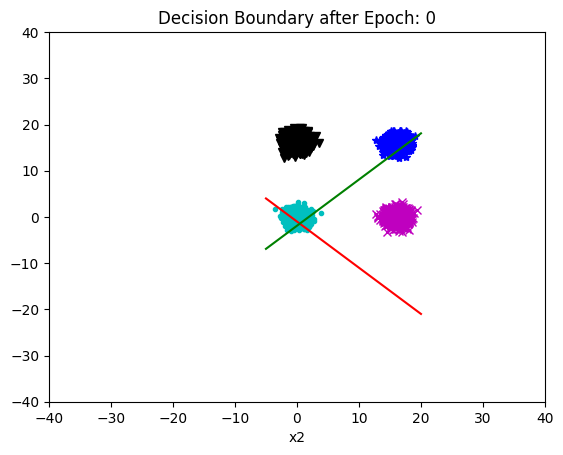

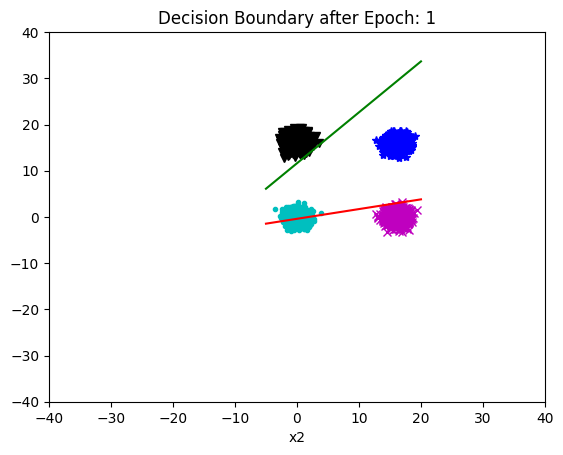

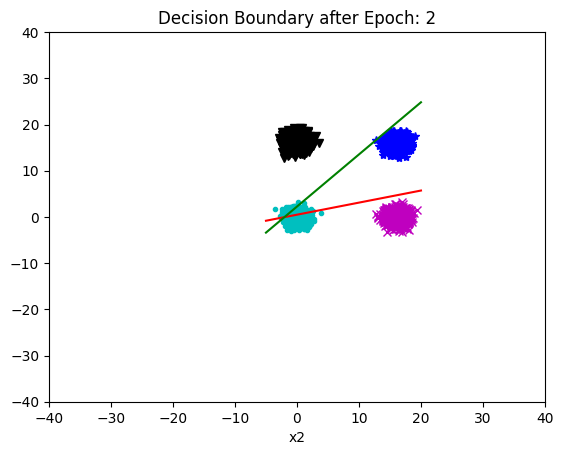

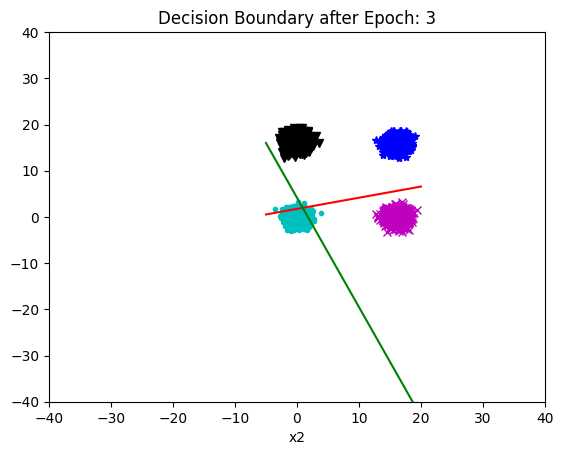

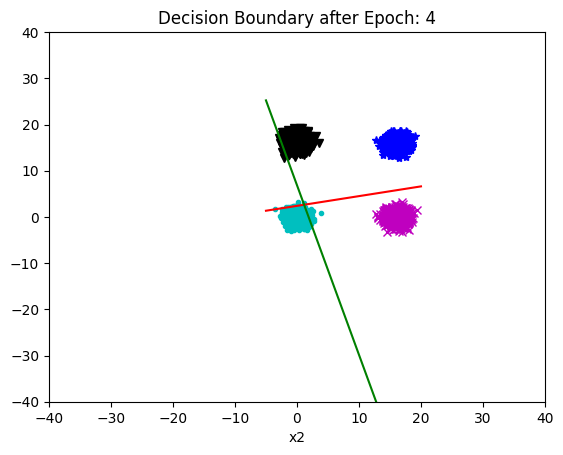

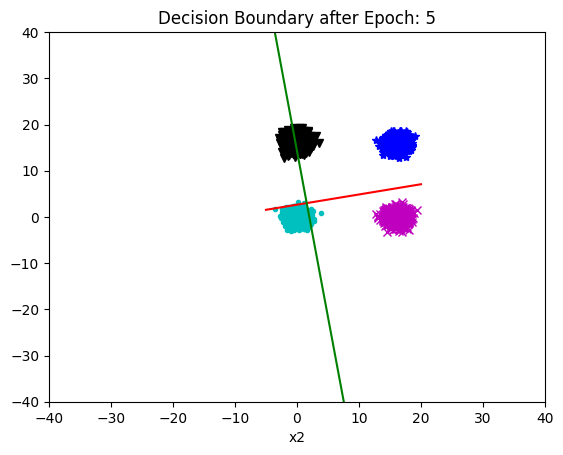

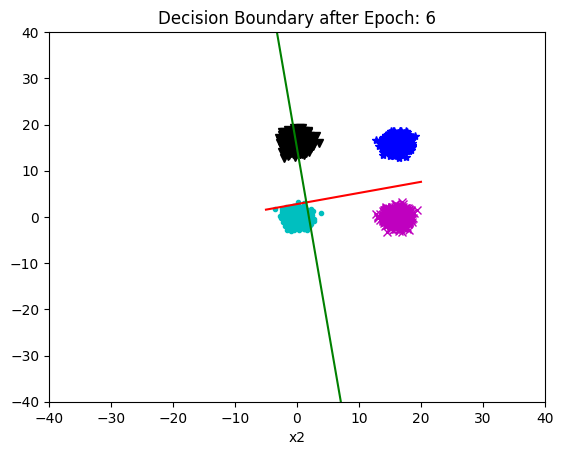

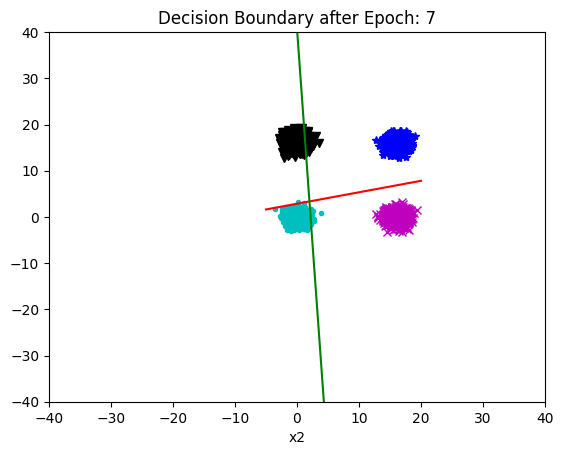

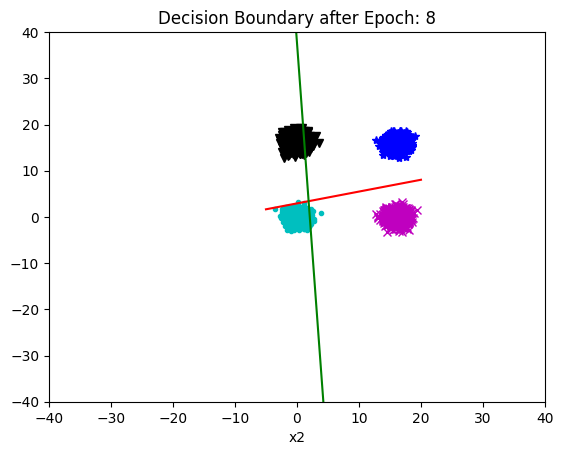

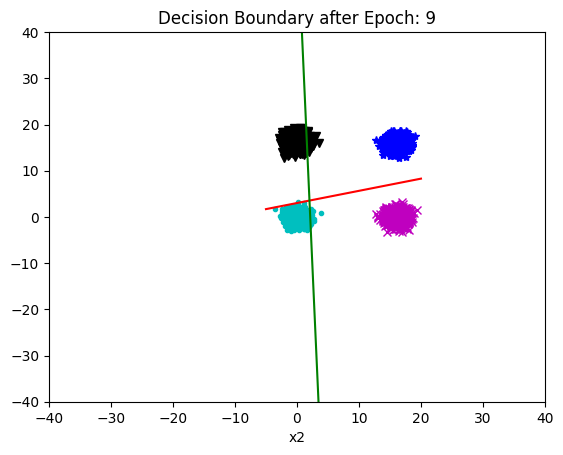

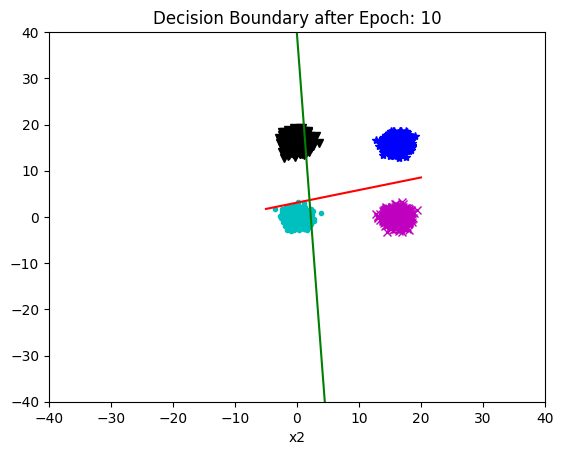

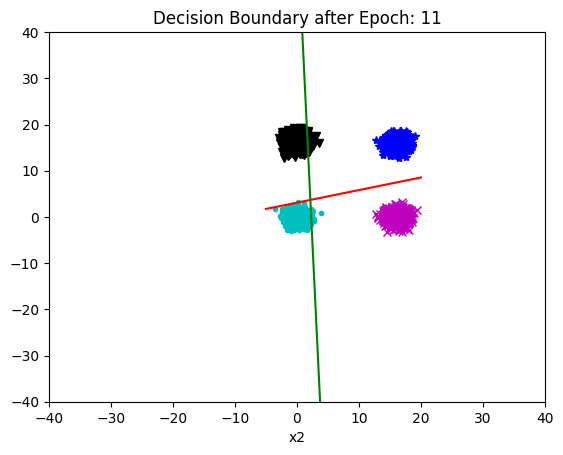

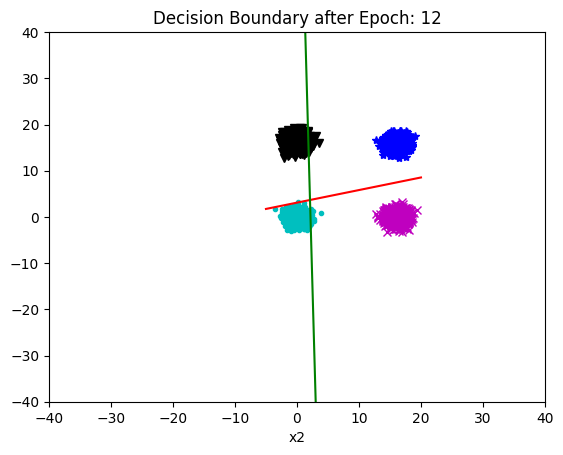

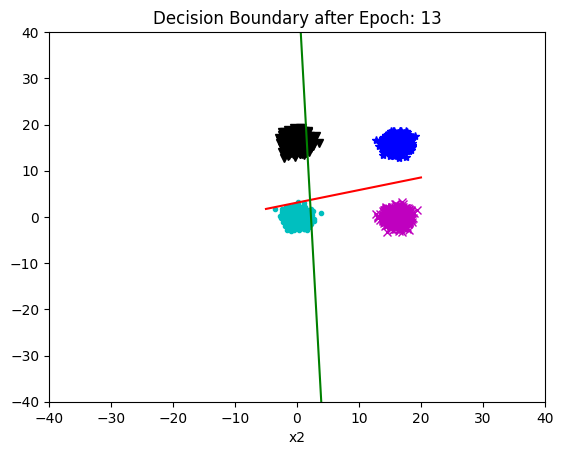

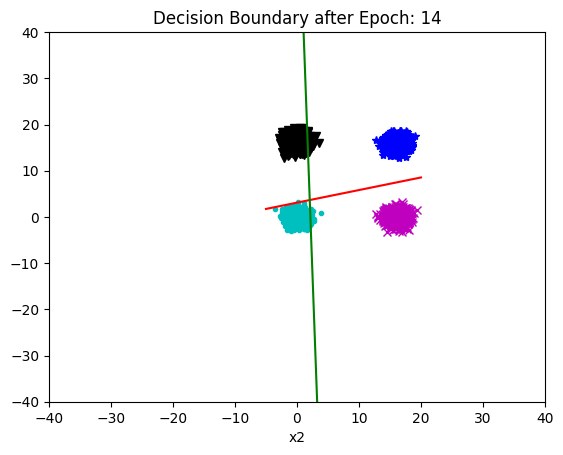

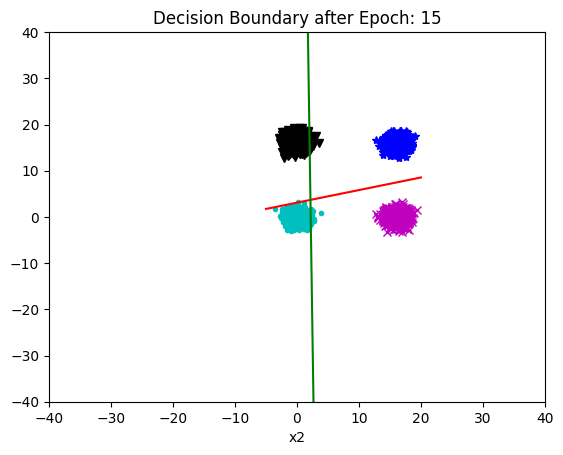

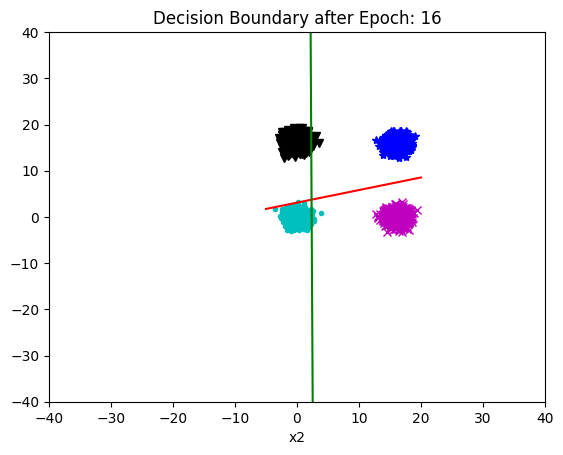

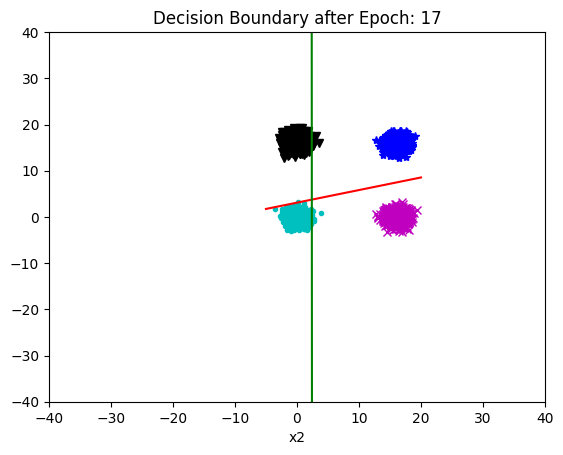

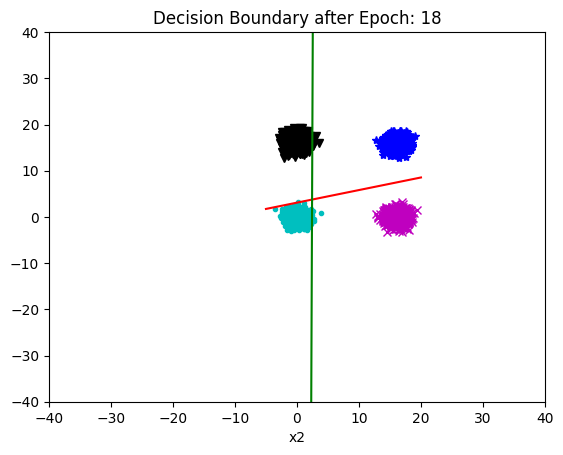

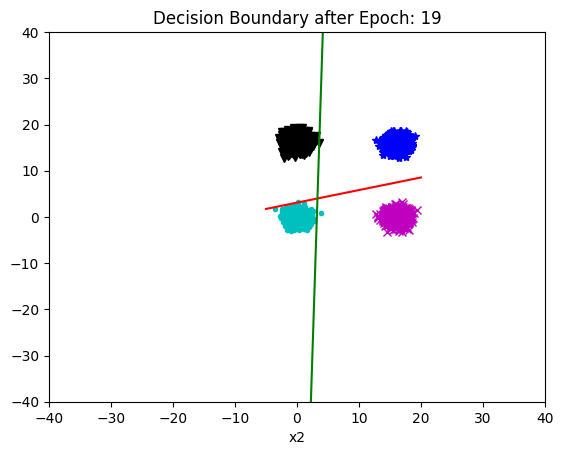

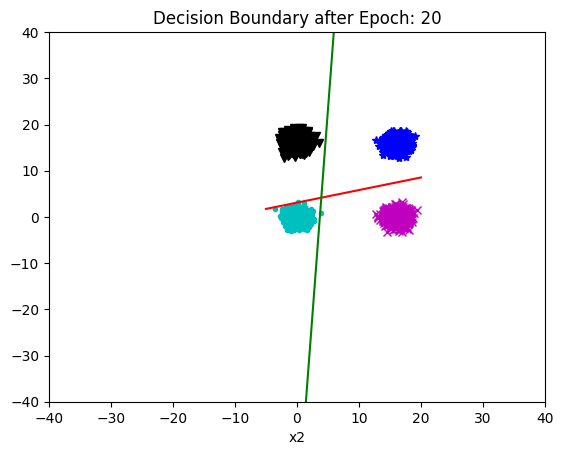

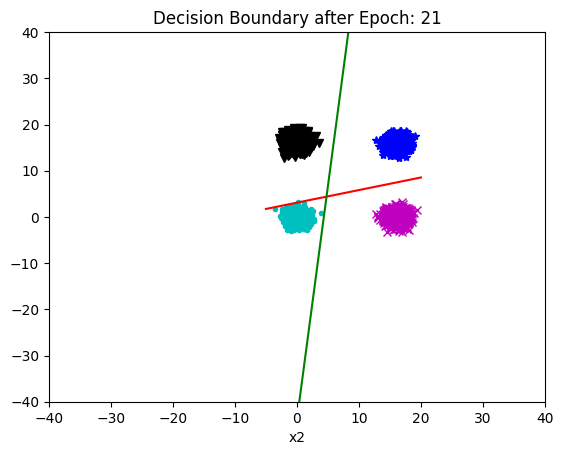

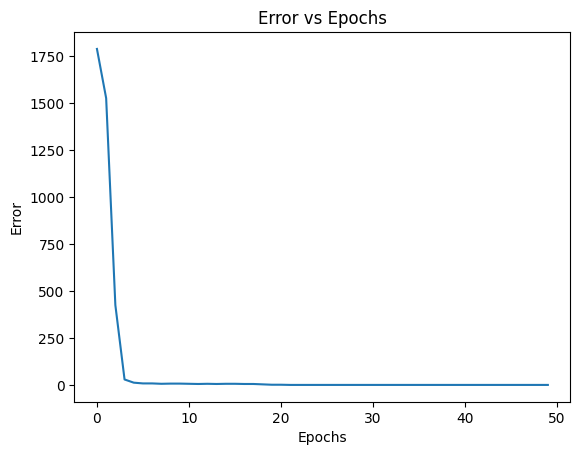

Loss:  [1788, 1526, 425, 29, 12, 8, 8, 6, 7, 7, 6, 5, 6, 5, 6, 6, 5, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[-0.386      -0.105     ]
 [-0.03400519  0.02424314]
 [ 0.12485345 -0.00239825]]


In [274]:
## Testing

w = perceptron_learning_loop(data_aug, y_true)
print(w)


Test Case:  1
Squared Error:  2
Accuracy:  99.8


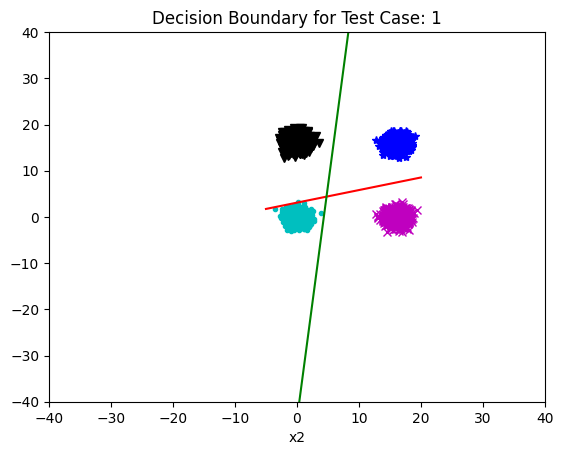

-----------------------------------------
Test Case:  2
Squared Error:  3
Accuracy:  99.7


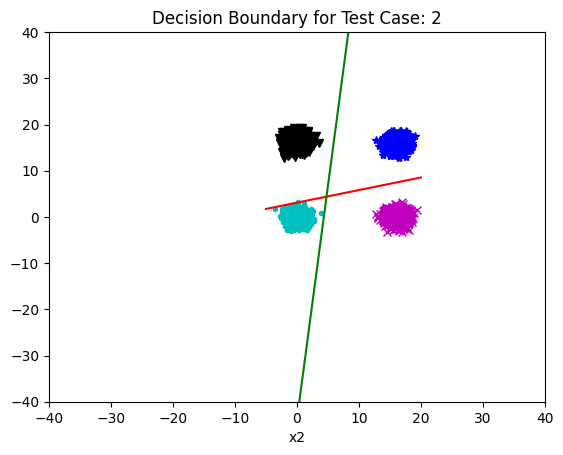

-----------------------------------------
Test Case:  3
Squared Error:  1
Accuracy:  99.9


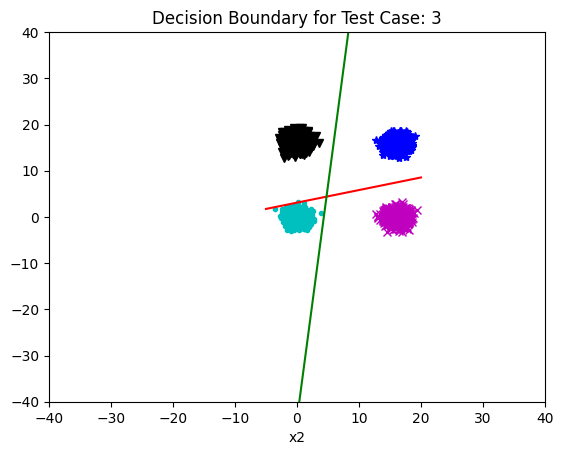

-----------------------------------------
Test Case:  4
Squared Error:  2
Accuracy:  99.8


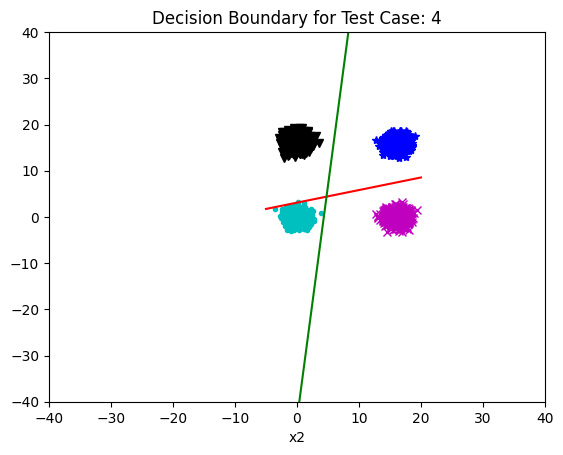

-----------------------------------------
Test Case:  5
Squared Error:  1
Accuracy:  99.9


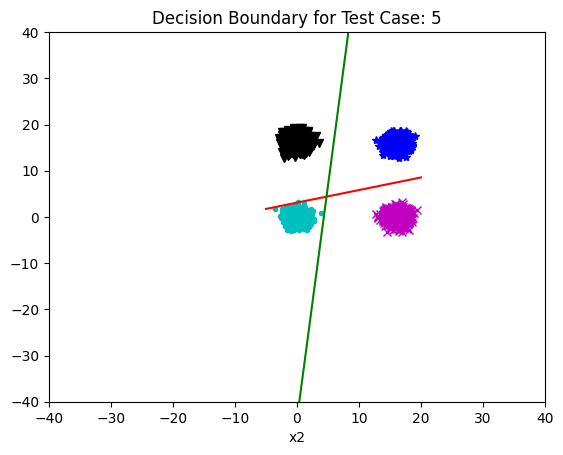

-----------------------------------------
Test Case:  6
Squared Error:  2
Accuracy:  99.8


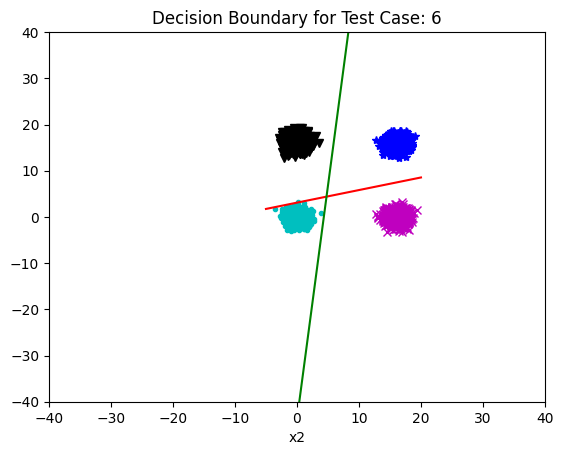

-----------------------------------------
Test Case:  7
Squared Error:  0
Accuracy:  100.0


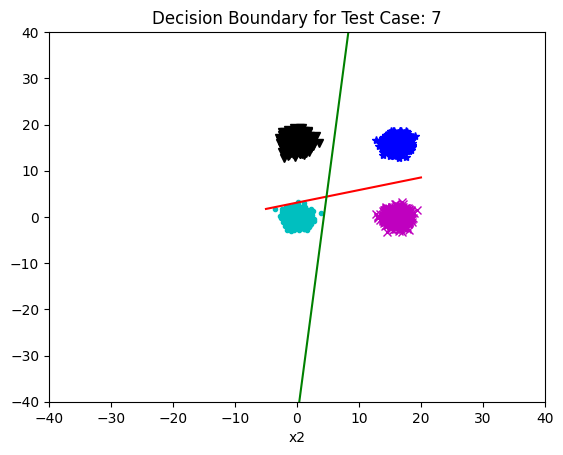

-----------------------------------------
Test Case:  8
Squared Error:  2
Accuracy:  99.8


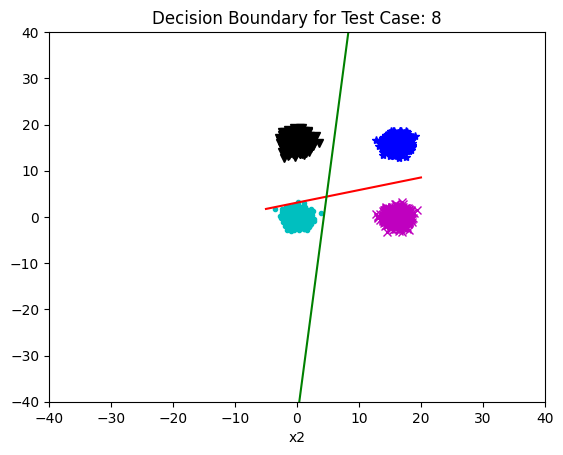

-----------------------------------------
Test Case:  9
Squared Error:  2
Accuracy:  99.8


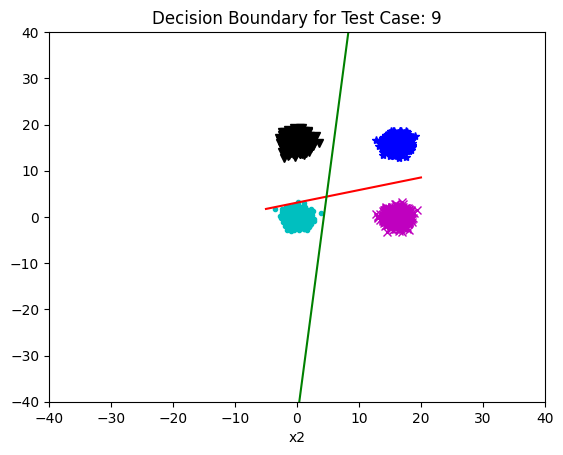

-----------------------------------------
Test Case:  10
Squared Error:  1
Accuracy:  99.9


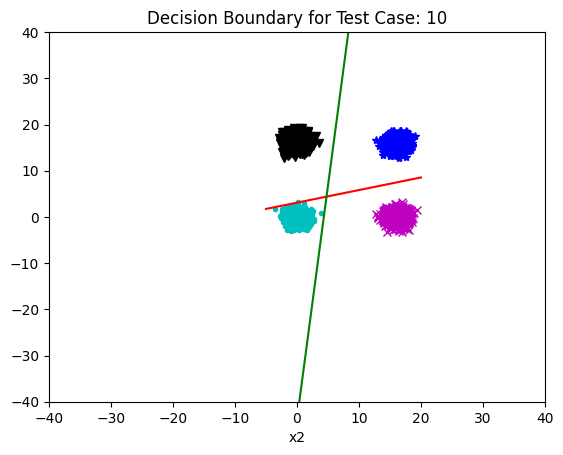

-----------------------------------------


In [275]:
# Testing

def plot_data_and_decision_boundary_for_testing(w, test_case):
  # Plot the data points and the decision boundary after training
  
  # Plot the data points
  plt.figure()
  plt.plot(data[0][:,0],data[0][:,1],'.',color='c')
  plt.plot(data[1][:,0],data[1][:,1],'x',color='m')
  plt.plot(data[2][:,0],data[2][:,1],'v',color='k')
  plt.plot(data[3][:,0],data[3][:,1],'*',color='b')
  
  # Plot the decision boundary
  x = np.linspace(-5, 20, 10000)
  y1 = -w[0,0]/w[2,0] - (w[1,0]/w[2,0])*x
  y2 = -w[0,1]/w[2,1] - (w[1,1]/w[2,1])*x
  plt.plot(x,y1,'r')
  plt.plot(x,y2,'g')
  plt.xlabel('x1')
  plt.xlabel('x2')
  plt.title('Decision Boundary for Test Case: {}'.format(test_case))
  
  plt.xlim(-40,40)
  plt.ylim(-40,40)
  plt.show()
  
  return

for i in range(10):
  print("Test Case: ", i+1)
  test_case = i+1
  # Generate the test data
  test_data = GenerateData(1000, Mean, Cov)
  # Augment the test data
  test_data_aug=np.concatenate((np.ones((test_data[0].shape[0],1)),test_data[0]),axis=1)
  # Initialize the number of samples
  N = test_data_aug.shape[0]


  # Calculate the output
  y_est = np.dot(test_data_aug, w)

  # Initialize the number of output neurons
  M = 2

  total_error = 0

  y_pred = np.array([0,0])
  for i in range(N):
    for j in range(M):
      if y_est[i,j] > 0:
        y_pred[j] = 1
      else:
        y_pred[j] = 0
    
    # Get the error
    error = y_true[i] - y_pred
    total_error += np.sum(error**2)
    
    
  # Calculate the accuracy
  accuracy = 100 - (total_error/N)*100

  print("Squared Error: ", total_error)
  print("Accuracy: ", accuracy)
  
  # Draw the decision boundary
  
  plot_data_and_decision_boundary_for_testing(w, test_case)
  print("-----------------------------------------")

## Inferences and Conclusion : State all the key observations and conclusion

1. Whenever the data is linearly separable, the perceptron algorithm converges in a finite number of steps.
2. If the data is not linearly separable, the perceptron algorithm never converges.
3. The Learned Weights are not unique; as long as the data is linearly separable, the perceptron algorithm will find **some** separating hyperplane.
4. The Learned Hyperplane depends on the distribution of the data too; If the distribution of data is changed, the same hyperplane may not be able to classify the data correctly.


If the distribution of test data is even slightly different from the training data, the accuracy drops drastically.
Squared Error:  2240
Accuracy:  0.0


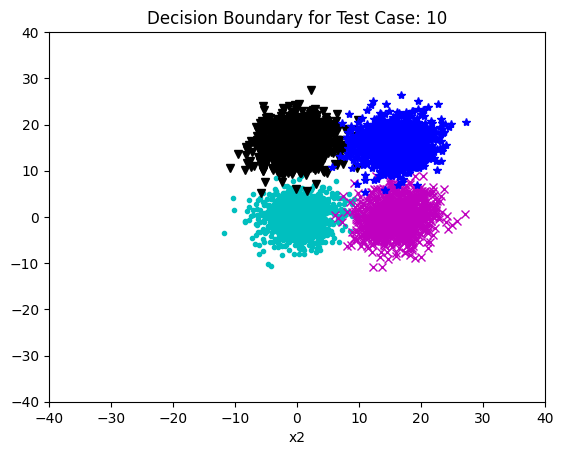

In [279]:
#Change the covariance matrix to [[1,0.5],[0.5,1]] and repeat the above steps. 

print("If the distribution of test data is even slightly different from the training data, the accuracy drops drastically.")

# Generate the data
Cov = [[10,1], [1,10]]
data = GenerateData(1000, Mean, Cov)

# Augment the data
data_total = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])
data_aug=np.concatenate((np.ones((data_total.shape[0],1)),data_total),axis=1)

# Define Target Labels
y1 = np.array([[0,0] for i in range(1000)]).reshape((1000,2))
y2 = np.array([[0,1] for i in range(1000)]).reshape((1000,2))
y3 = np.array([[1,0] for i in range(1000)]).reshape((1000,2))
y4 = np.array([[1,1] for i in range(1000)]).reshape((1000,2))

y_true = np.concatenate((y1,y2,y3,y4), axis=0)

# Use same weights as before

num_correctly_classified = 0

y_est = np.dot(data_aug, w)
y_pred = np.array([0,0])
for i in range(N):
    for j in range(M):
        if y_est[i,j] > 0:
            y_pred[j] = 1
        else:
            y_pred[j] = 0
    
    # Get the error
    error = y_true[i] - y_pred
    if (y_pred == y_true[i]).all():
        num_correctly_classified += 1
    total_error += np.sum(error**2)
    
    
  # Calculate the accuracy (prediction is correct only if y_true = y_pred)
  
accuracy = (num_correctly_classified/N)*100

  
print("Squared Error: ", total_error)
print("Accuracy: ", accuracy)

# Draw the decision boundary
plot_data_and_decision_boundary_for_testing(w, test_case)

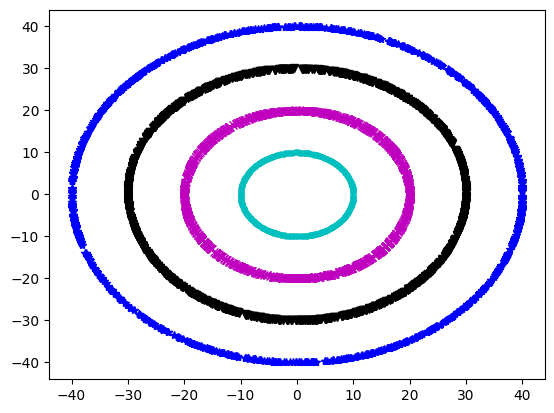

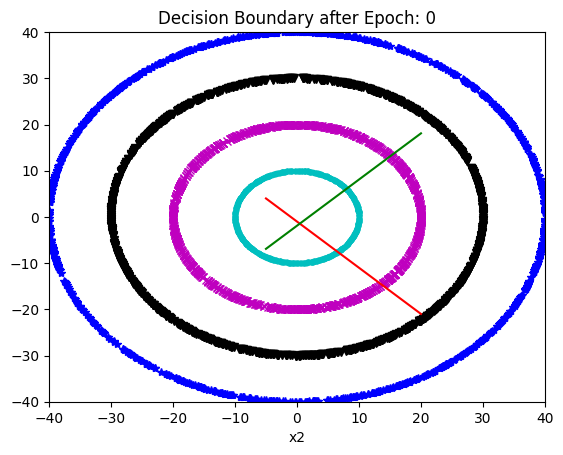

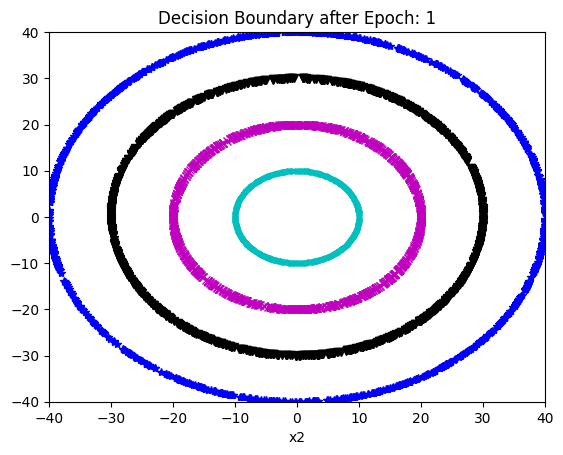

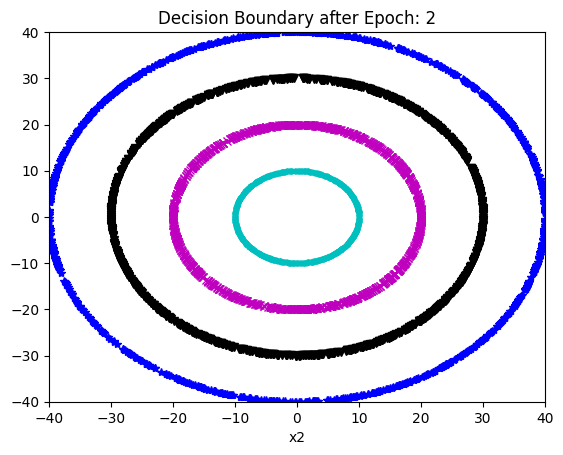

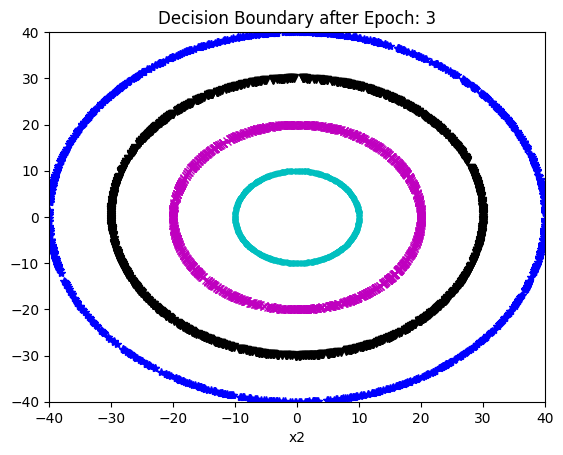

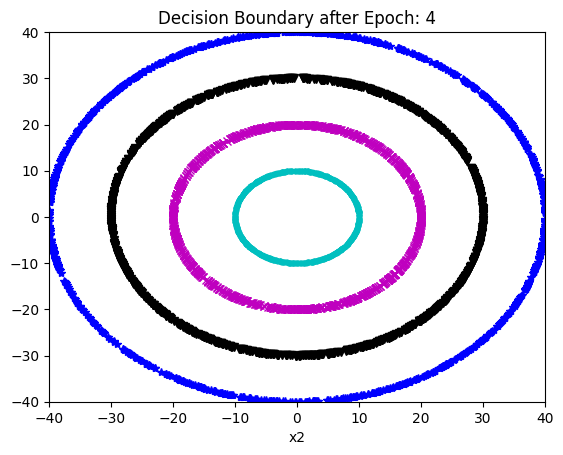

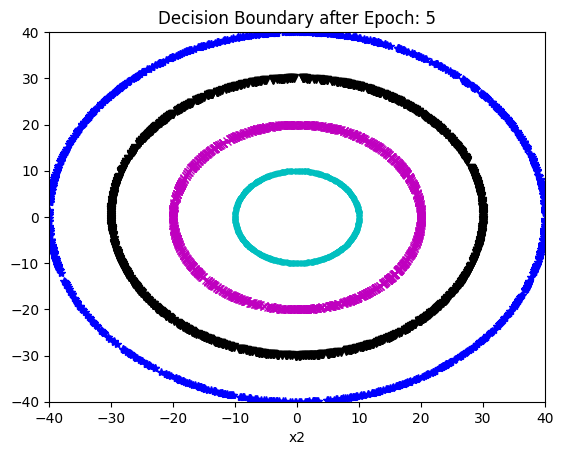

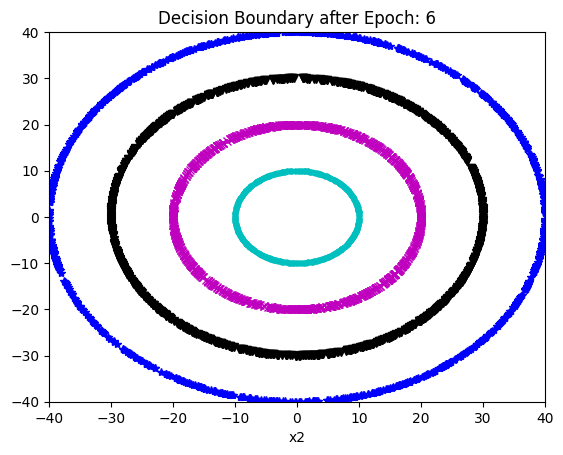

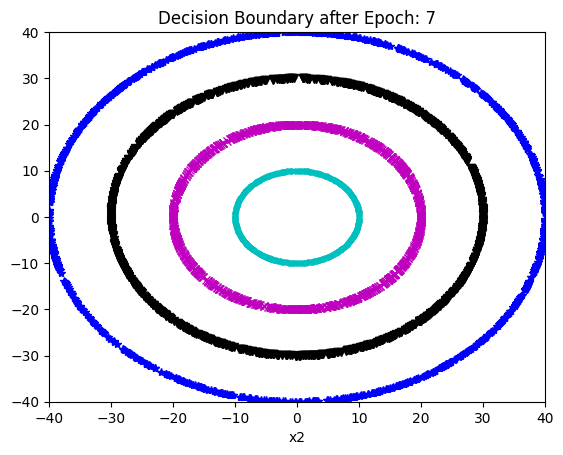

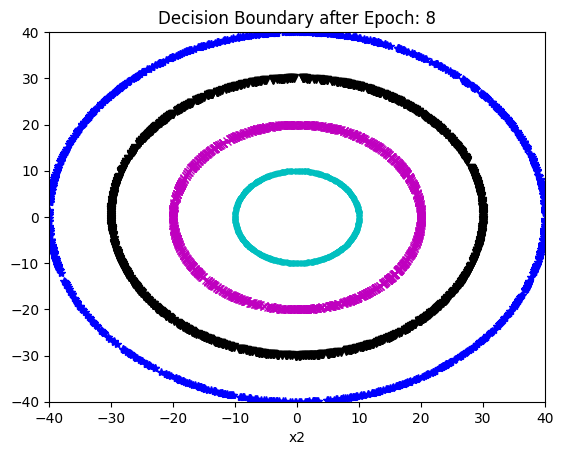

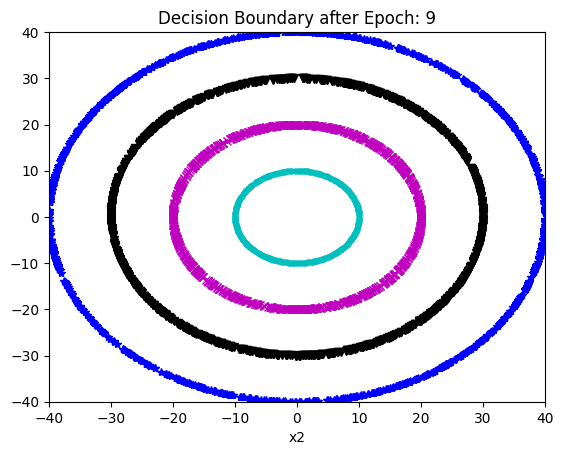

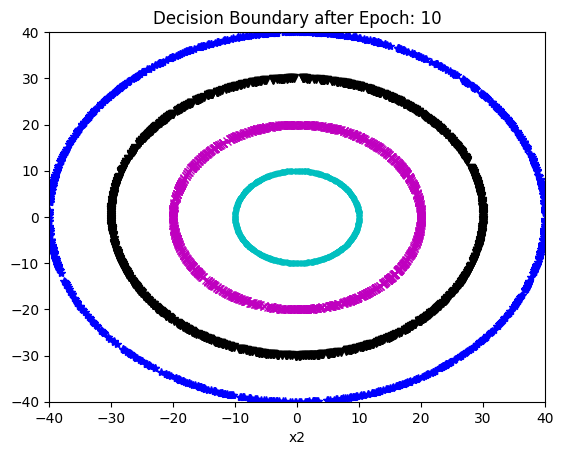

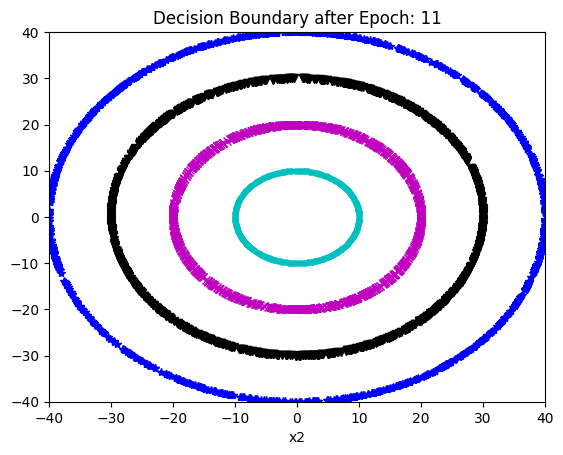

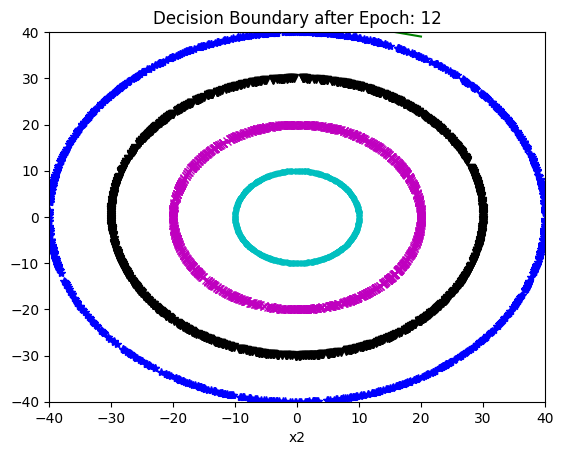

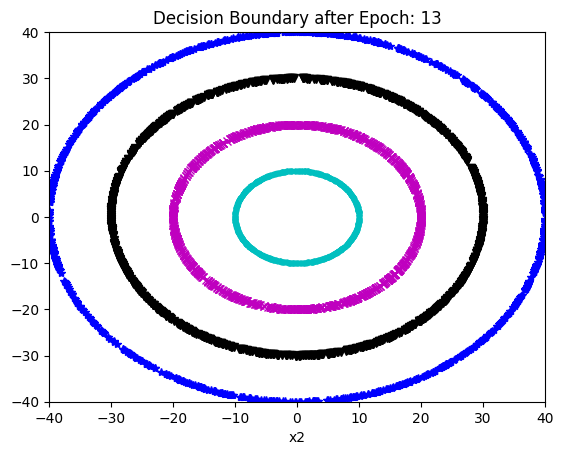

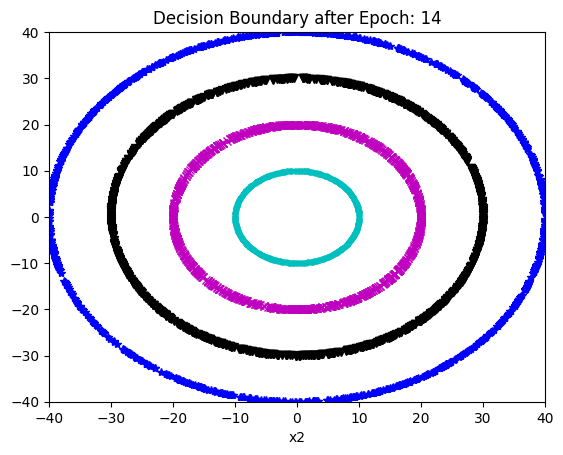

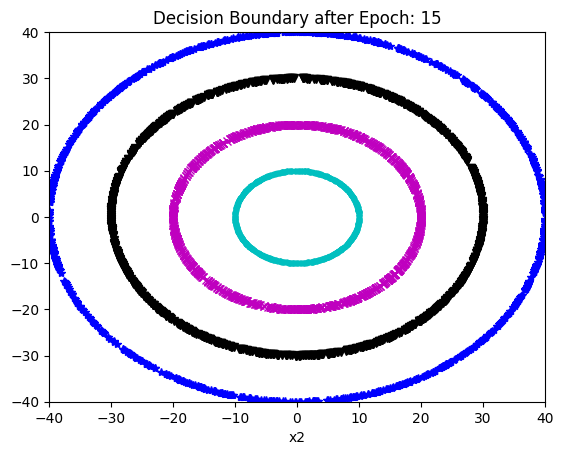

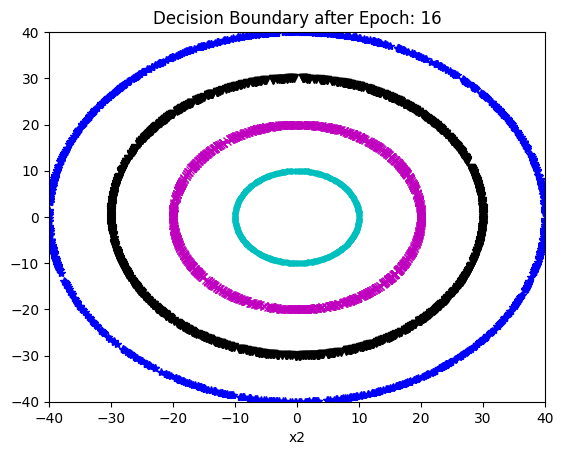

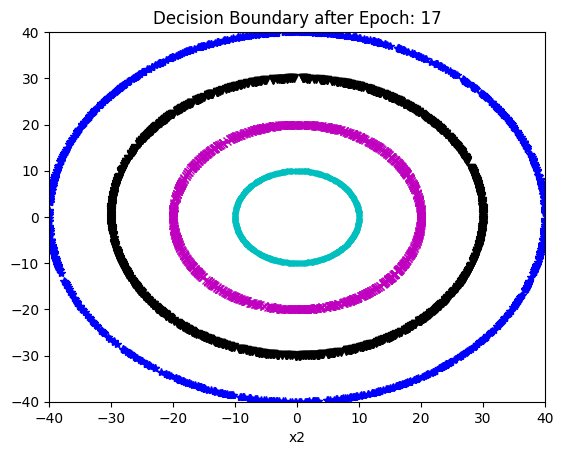

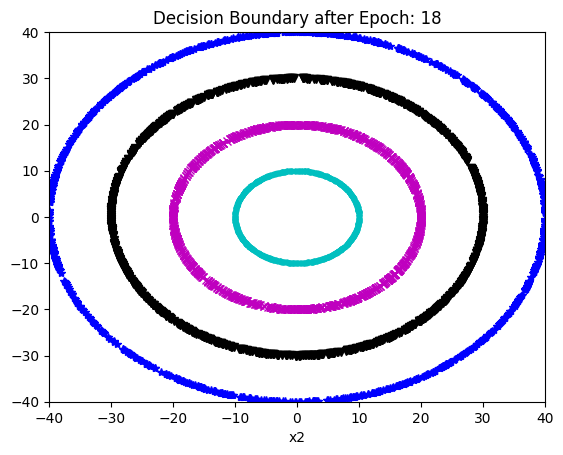

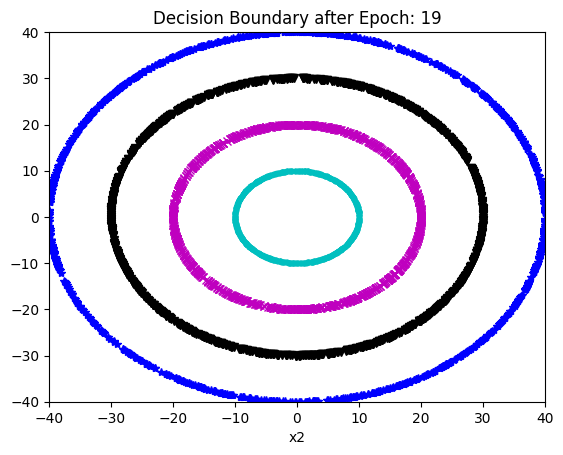

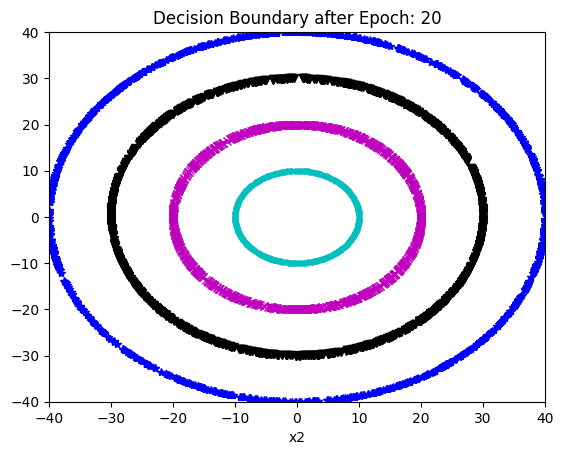

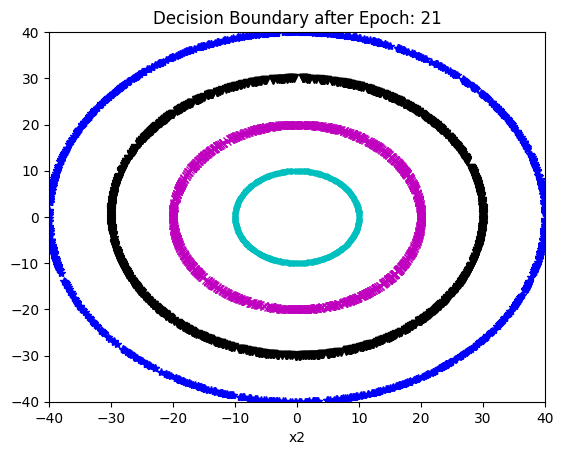

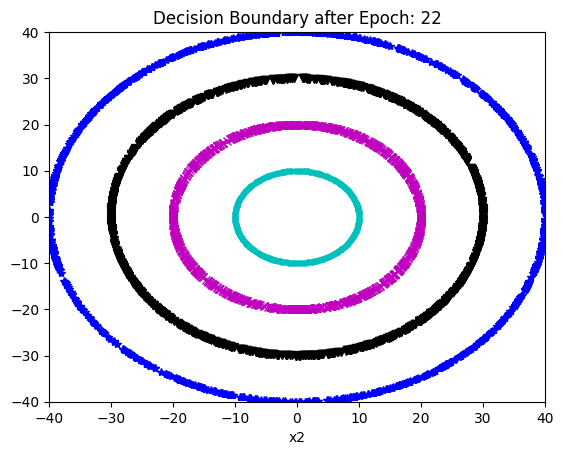

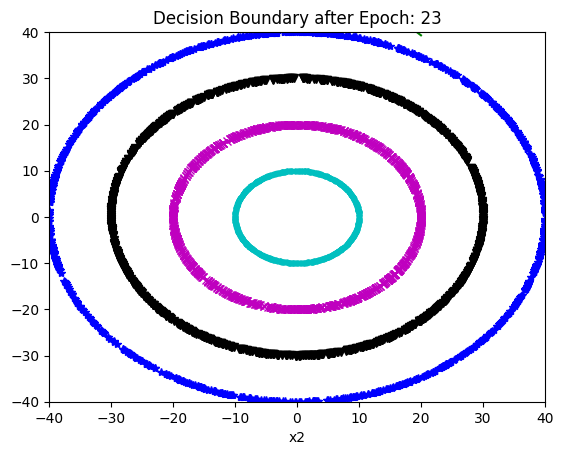

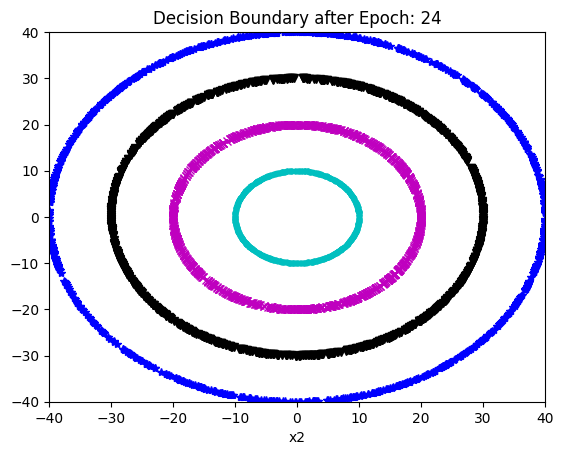

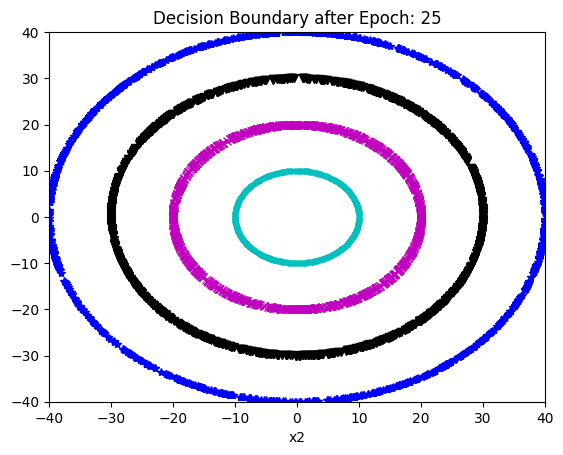

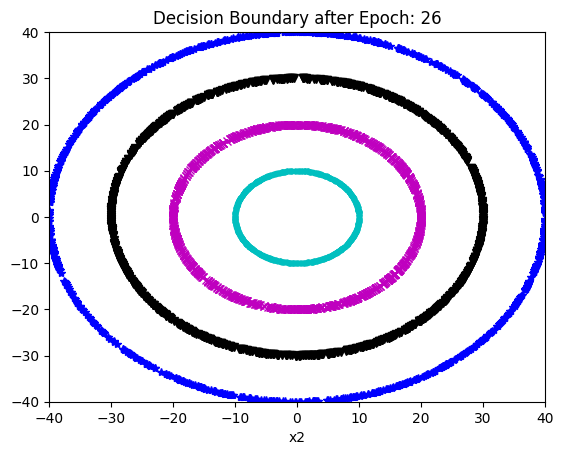

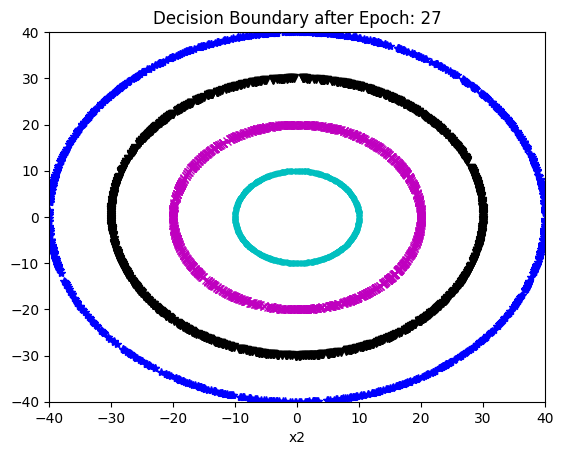

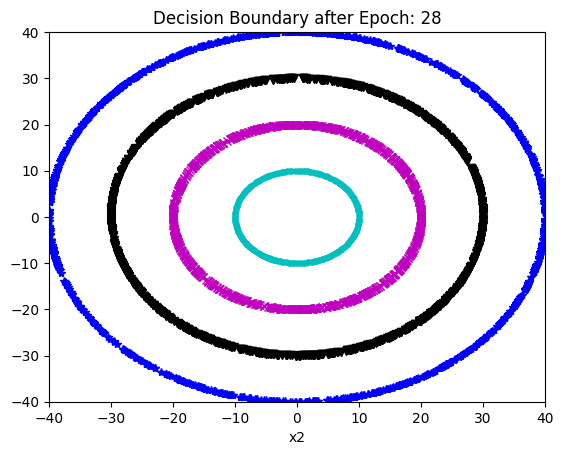

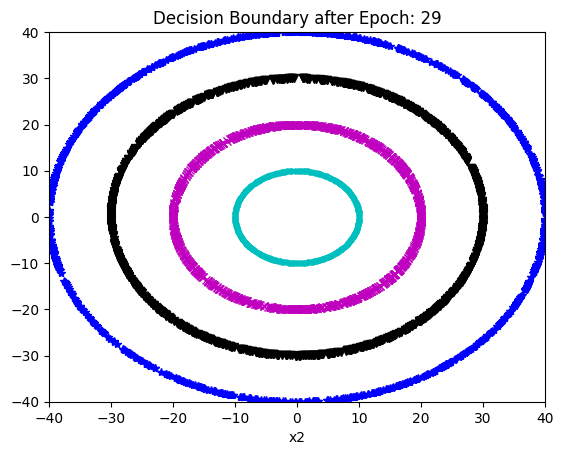

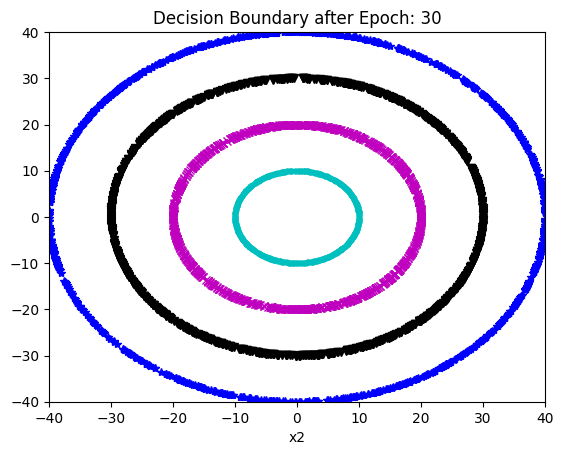

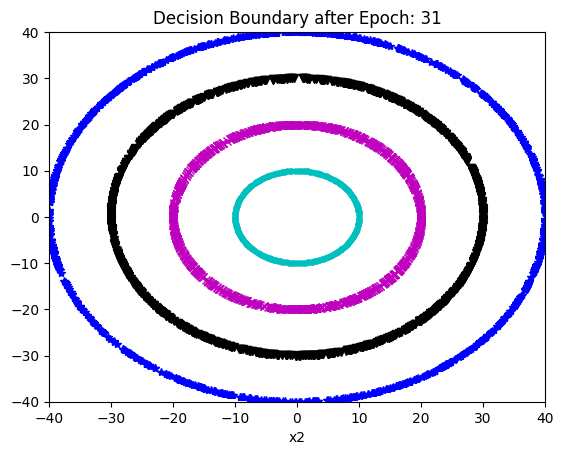

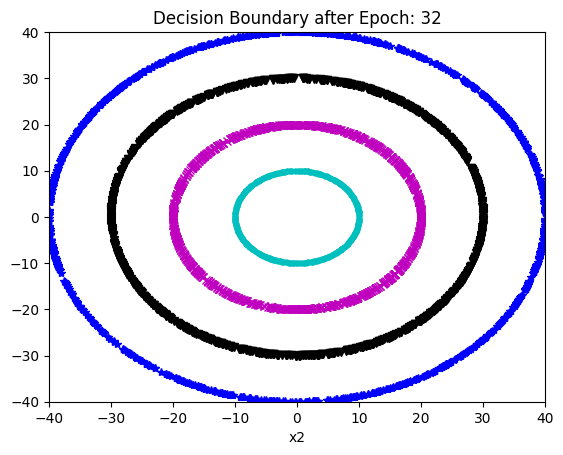

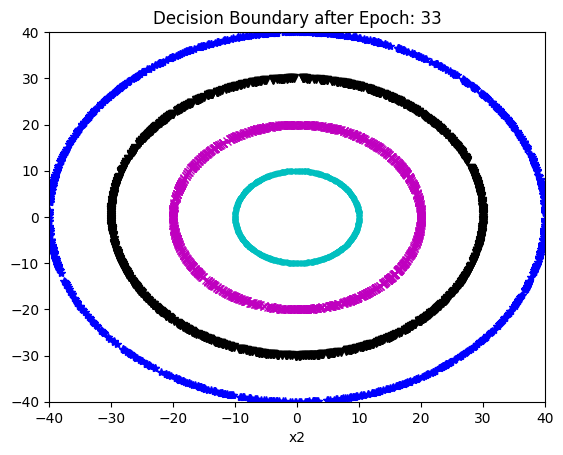

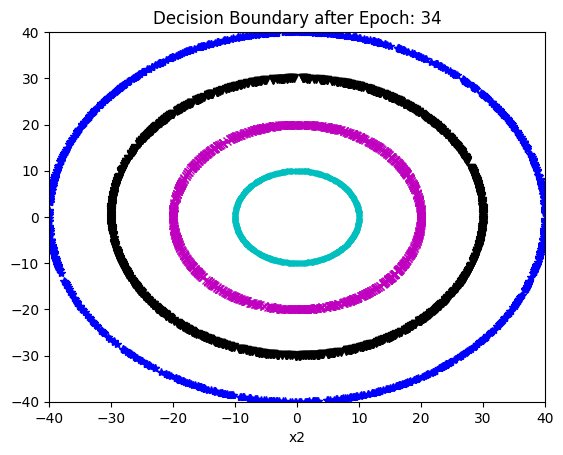

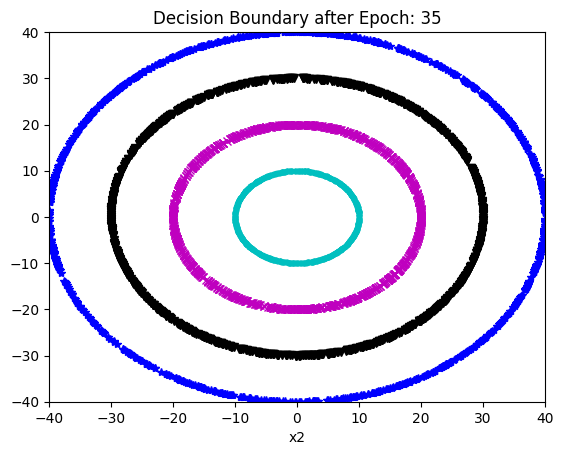

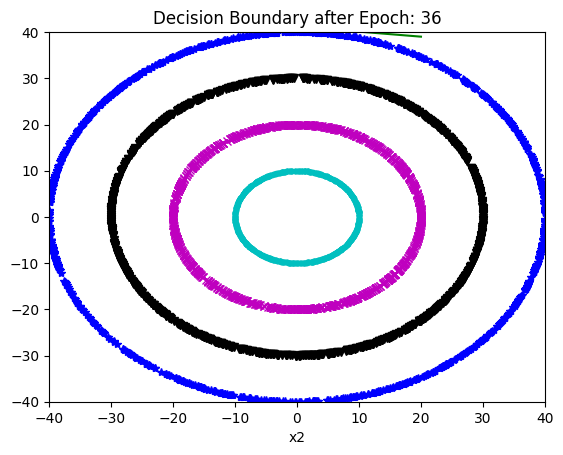

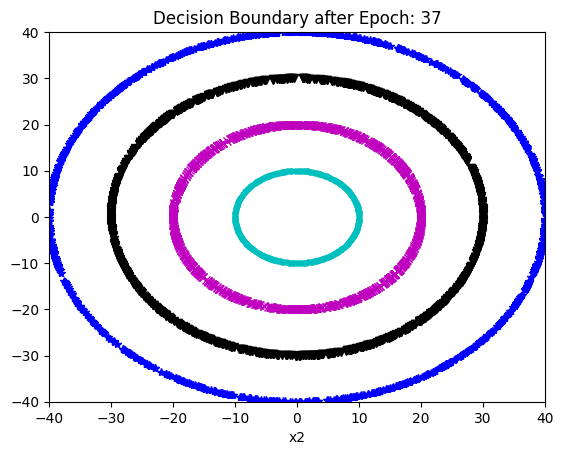

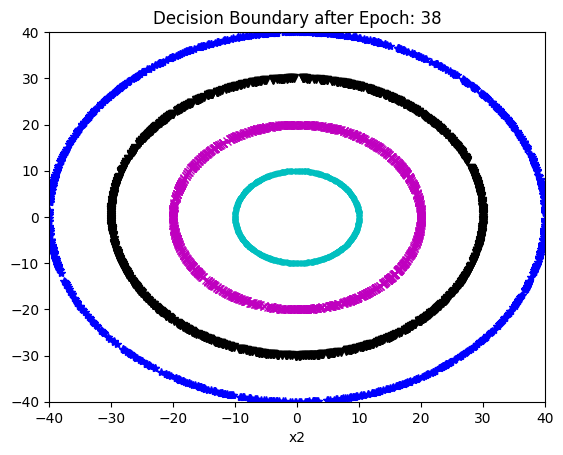

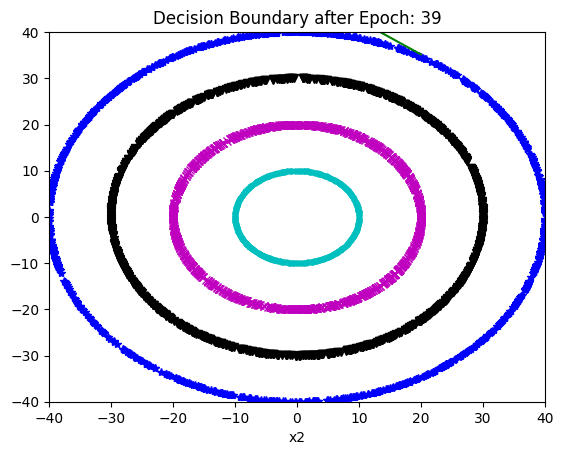

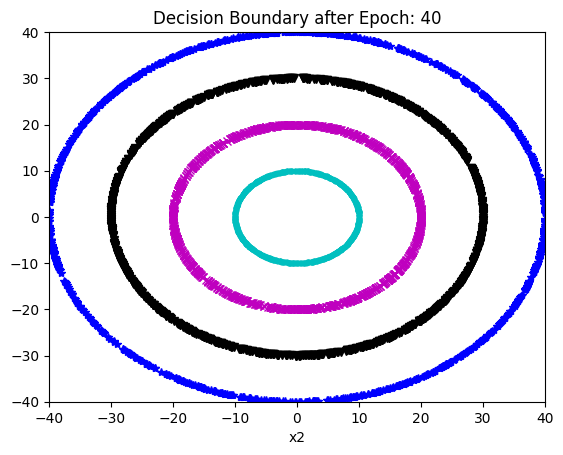

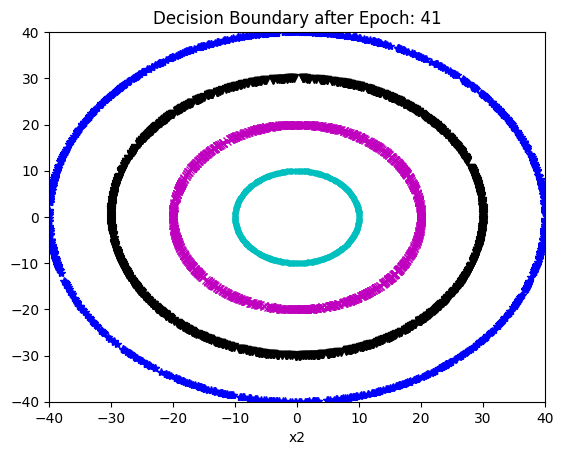

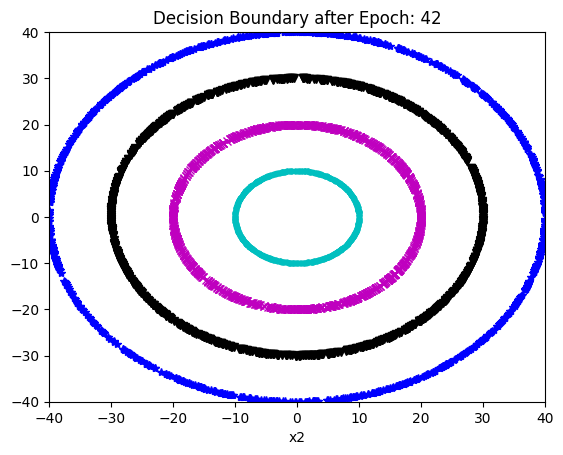

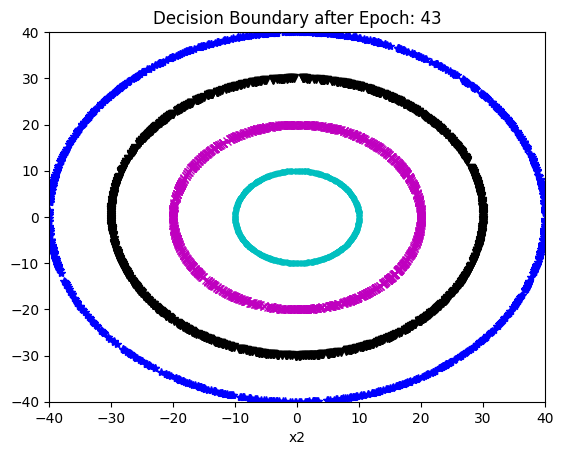

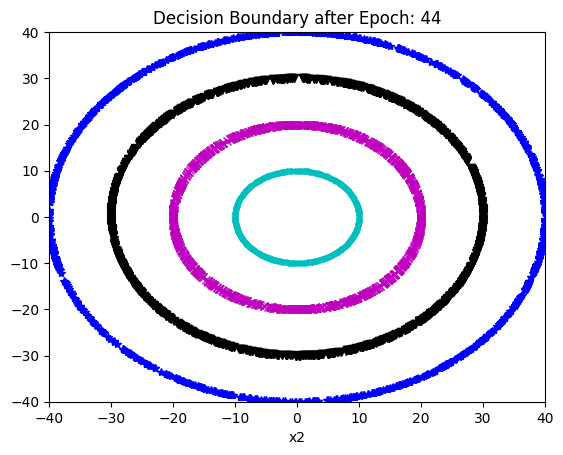

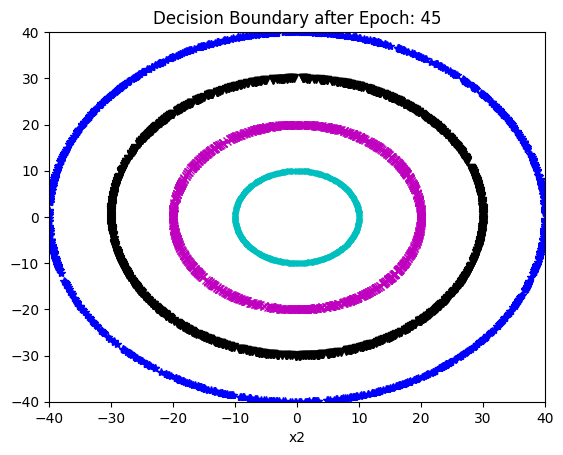

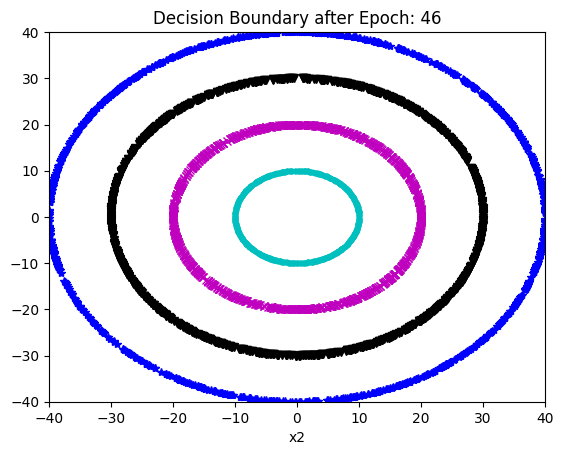

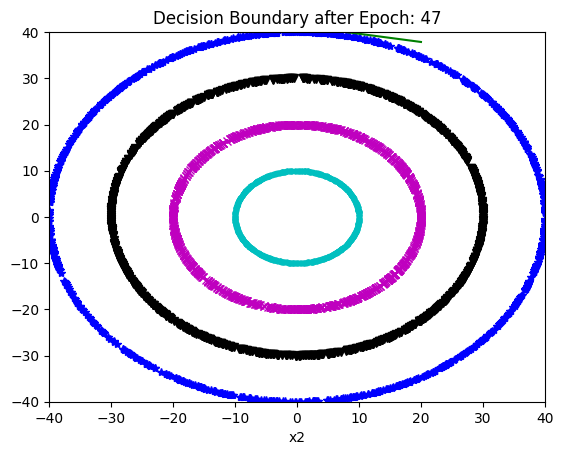

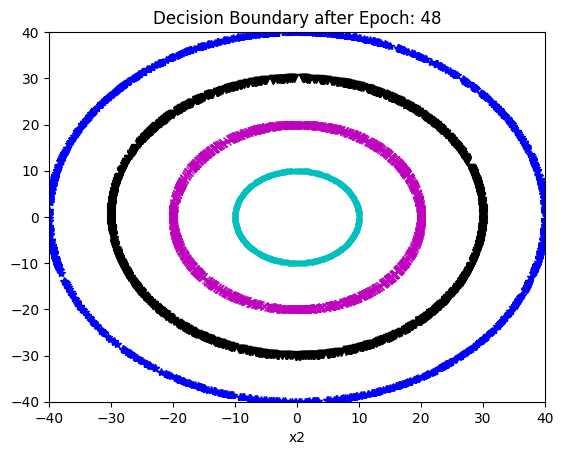

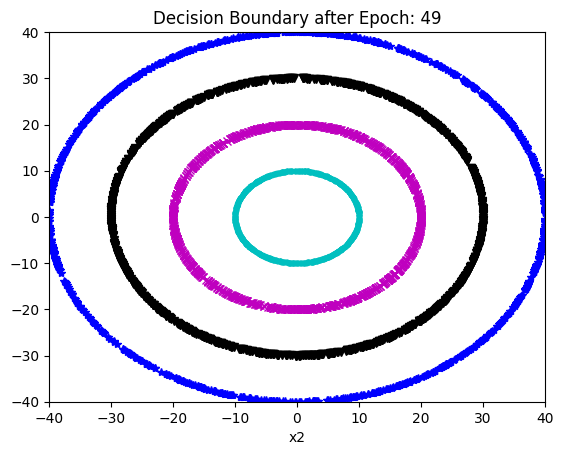

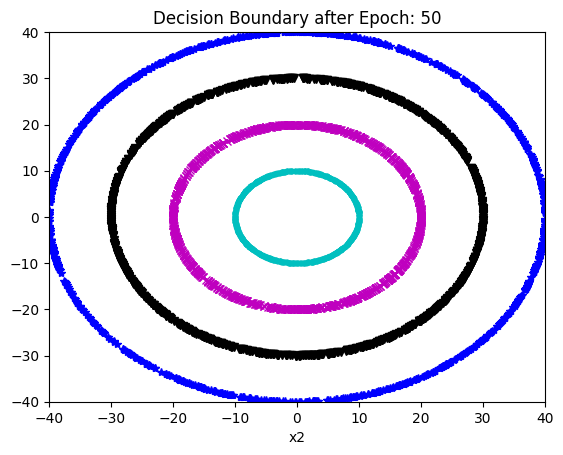

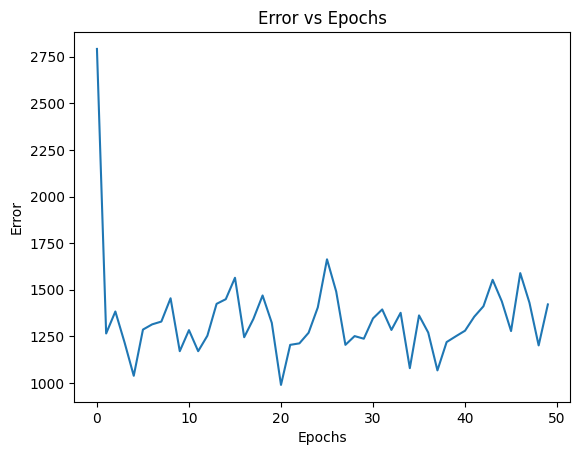

Loss:  [2792, 1265, 1383, 1217, 1038, 1286, 1314, 1329, 1454, 1170, 1283, 1170, 1253, 1424, 1449, 1564, 1245, 1343, 1469, 1322, 989, 1204, 1212, 1269, 1405, 1663, 1490, 1204, 1251, 1237, 1346, 1394, 1284, 1376, 1079, 1362, 1270, 1067, 1219, 1250, 1280, 1355, 1411, 1553, 1437, 1278, 1589, 1430, 1201, 1421]
[[ 0.272       0.188     ]
 [ 0.00321398  0.00069705]
 [ 0.00475304 -0.00371506]]


In [278]:
# Show that the method fails to classify the non-linearly separable data

# Generate Concentric Circles of data (4 classes)
N = 1000
r1 = 10
r2 = 20
r3 = 30
r4 = 40

# Generate the data
data = [[],[],[],[]]

for i in range(N):
    theta = np.random.uniform(0, 2*np.pi)
    data[0].append([r1*np.cos(theta), r1*np.sin(theta)])
    
for i in range(N):
    theta = np.random.uniform(0, 2*np.pi)
    data[1].append([r2*np.cos(theta), r2*np.sin(theta)])
    
for i in range(N):
    theta = np.random.uniform(0, 2*np.pi)
    data[2].append([r3*np.cos(theta), r3*np.sin(theta)])
    
for i in range(N):
    theta = np.random.uniform(0, 2*np.pi)
    data[3].append([r4*np.cos(theta), r4*np.sin(theta)])
    
data = np.array(data)

# Plot the data
plt.figure()
plt.plot(data[0][:,0],data[0][:,1],'.',color='c')
plt.plot(data[1][:,0],data[1][:,1],'x',color='m')
plt.plot(data[2][:,0],data[2][:,1],'v',color='k')
plt.plot(data[3][:,0],data[3][:,1],'*',color='b')

# Augment the data
data_total = np.array(data).reshape(len(data)*data[0].shape[0],data[0].shape[1])
data_aug=np.concatenate((np.ones((data_total.shape[0],1)),data_total),axis=1)


# Define Target Labels
y1 = np.array([[0,0] for i in range(1000)]).reshape((1000,2))
y2 = np.array([[0,1] for i in range(1000)]).reshape((1000,2))
y3 = np.array([[1,0] for i in range(1000)]).reshape((1000,2))
y4 = np.array([[1,1] for i in range(1000)]).reshape((1000,2))

y_true = np.concatenate((y1,y2,y3,y4), axis=0)


# Repeat the training loop
w = perceptron_learning_loop(data_aug, y_true)
print(w)



